In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_roc_curve, accuracy_score, roc_curve

In [ ]:
df = pd.read_csv('/content/Autism-Child-Data.csv', na_values='?')

In [ ]:
df.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 4
gender              0
ethnicity          43
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           43
Class/ASD           0
dtype: int64

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,6.0,m,Others,no,no,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,1,1,0,1,0,0,6.0,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,NO
2,1,1,0,0,0,1,1,1,0,0,6.0,m,NaN,no,no,Jordan,yes,5,'4-11 years',NaN,NO
3,0,1,0,0,1,1,0,0,0,1,5.0,f,NaN,yes,no,Jordan,no,4,'4-11 years',NaN,NO
4,1,1,1,1,1,1,1,1,1,1,5.0,m,Others,yes,no,'United States',no,10,'4-11 years',Parent,YES


In [ ]:
#gender percentage
print('Female %:', (sum(df['gender'] == 'f')/df.shape[0]) *100)
print('Male %:', (sum(df['gender'] == 'm')/df.shape[0]) *100)

Female %: 28.767123287671232
Male %: 71.23287671232876


In [ ]:
print('Mean Age:', df['age'].mean())

Mean Age: 6.354166666666667


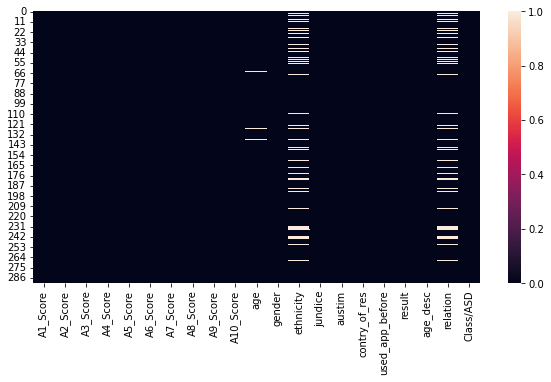

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), label = 'Missing values in the ASD in children dataset')

In [ ]:
#no. of attributes
df.shape[1]

21

**DATA CLEANING**

In [ ]:
df_clean = df.copy()

In [ ]:
#drop columns which has more than 14% missing values
null_var = df_clean.isnull().sum()/df_clean.shape[0] *100
null_var = df_clean.isnull().sum()/df_clean.shape[0] *100
drop_columns = null_var[null_var>14].keys()
print('Dropped Columns:', drop_columns)
df_clean = df_clean.drop(columns=drop_columns)

Dropped Columns: Index(['ethnicity', 'relation'], dtype='object')


In [ ]:
df_clean2 = df_clean.copy()

In [ ]:
#mean for missing numerical values
num_vars = df_clean2.select_dtypes(include=["int64", "float64"]).columns
imputer_mean = SimpleImputer(strategy='most_frequent')
imputer_mean.fit(df_clean2[num_vars])
df_clean2[num_vars] = imputer_mean.transform(df_clean2[num_vars])

In [ ]:
df_clean2.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
Class/ASD          0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Most Frequent Strategy')]

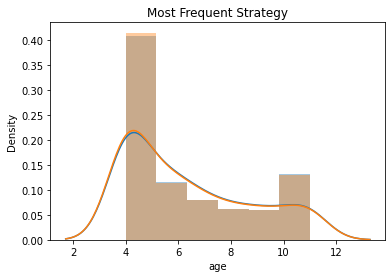

In [ ]:
#overlapping to find if the cleaning we have done is good enough to match the original data or not
sns.distplot(df['age'])
sns.distplot(df_clean2['age']).set(title = 'Most Frequent Strategy')

In [ ]:
df_clean2.mean()

A1_Score     0.633562
A2_Score     0.534247
A3_Score     0.743151
A4_Score     0.551370
A5_Score     0.743151
A6_Score     0.712329
A7_Score     0.606164
A8_Score     0.496575
A9_Score     0.493151
A10_Score    0.726027
age          6.321918
result       6.239726
dtype: float64

In [ ]:
df_clean2.median()

A1_Score     1.0
A2_Score     1.0
A3_Score     1.0
A4_Score     1.0
A5_Score     1.0
A6_Score     1.0
A7_Score     1.0
A8_Score     0.0
A9_Score     0.0
A10_Score    1.0
age          6.0
result       6.0
dtype: float64

In [ ]:
df_clean2.mode()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,contry_of_res,used_app_before,result,age_desc,Class/ASD
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,m,no,no,'United Kingdom',no,7.0,'4-11 years',NO
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN


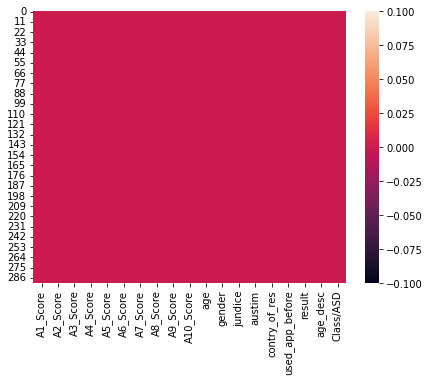

In [ ]:
#cleaned data
plt.figure(figsize=(7,5))
sns.heatmap(df_clean2.isnull())

**ONE-HOT ENCODING**

In [ ]:
df_encode = df_clean2.copy()

In [ ]:
#part of feature selection
df_drop = df_encode.drop(columns=['contry_of_res', 'age_desc'])

In [ ]:
#since one column of data is enough
df_dummmy = pd.get_dummies(df_drop, drop_first=True)
df_dummmy.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,gender_m,jundice_yes,austim_yes,used_app_before_yes,Class/ASD_YES
0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,6.0,5.0,1,0,0,0,0
1,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,6.0,5.0,1,0,0,0,0
2,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,6.0,5.0,1,0,0,1,0
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,5.0,4.0,0,1,0,0,0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,10.0,1,1,0,0,1


**TRAIN_TEST_SPLIT**

In [ ]:
df_split = df_dummmy.copy()

In [ ]:
X = df_split.drop('Class/ASD_YES', axis = 1)
y = df_split['Class/ASD_YES']
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (292, 16)
y shape: (292,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (233, 16)
X_test shape: (59, 16)
y_train shape: (233,)
y_test shape: (59,)


In [ ]:
#validation set
X_train2, X_test2, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size=0.2, random_state=51)
print('X_train shape:', X_train2.shape)
print('X_test shape:', X_test2.shape)
print('y_train shape:', y_train_val.shape)
print('y_test shape:', y_test_val.shape)

X_train shape: (186, 16)
X_test shape: (47, 16)
y_train shape: (186,)
y_test shape: (47,)


In [ ]:
X_train.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,gender_m,jundice_yes,austim_yes,used_app_before_yes
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,0.635193,0.532189,0.729614,0.523605,0.738197,0.703863,0.605150,0.489270,0.480687,0.742489,6.446352,6.180258,0.695279,0.283262,0.150215,0.025751
std,0.482412,0.500037,0.445116,0.500518,0.440562,0.457535,0.489871,0.500961,0.500702,0.438204,2.392138,2.295450,0.461280,0.451552,0.358051,0.158733
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,6.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000,1.000000,1.000000,1.000000,1.000000


**FEATURE SCALING**

In [ ]:
mmc = MinMaxScaler()
mmc.fit(X_train2)

MinMaxScaler()

In [ ]:
X_train_mmc = mmc.transform(X_train2)
X_test_mmc = mmc.transform(X_test2)
X_test_final = mmc.transform(X_test) 

In [ ]:
X_train_mmc

array([[1., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [ ]:
#convert into a dataset again
cols = list(df_split.columns)
cols.remove('Class/ASD_YES')
X_train_mmc2 = pd.DataFrame(X_train_mmc, columns=cols)
X_test_mmc2 = pd.DataFrame(X_test_mmc, columns=cols)
X_test_final2 = pd.DataFrame(X_test_final, columns=cols)

In [ ]:
X_train_mmc2.describe().round(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,gender_m,jundice_yes,austim_yes,used_app_before_yes
count,186.00,186.00,186.00,186.00,186.00,186.00,186.00,186.00,186.00,186.00,186.00,186.00,186.00,186.00,186.00,186.00
mean,0.63,0.55,0.74,0.51,0.75,0.72,0.61,0.49,0.47,0.74,0.33,0.62,0.69,0.30,0.16,0.03
std,0.48,0.50,0.44,0.50,0.44,0.45,0.49,0.50,0.50,0.44,0.34,0.23,0.46,0.46,0.37,0.16
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.00
50%,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.14,0.60,1.00,0.00,0.00,0.00
75%,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.57,0.80,1.00,1.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
#plot pairplot to see the distribution
#sns.pairplot(X_train2)

In [ ]:
#sns.pairplot(X_train_mmc2)

**FEATURE SELECTION**

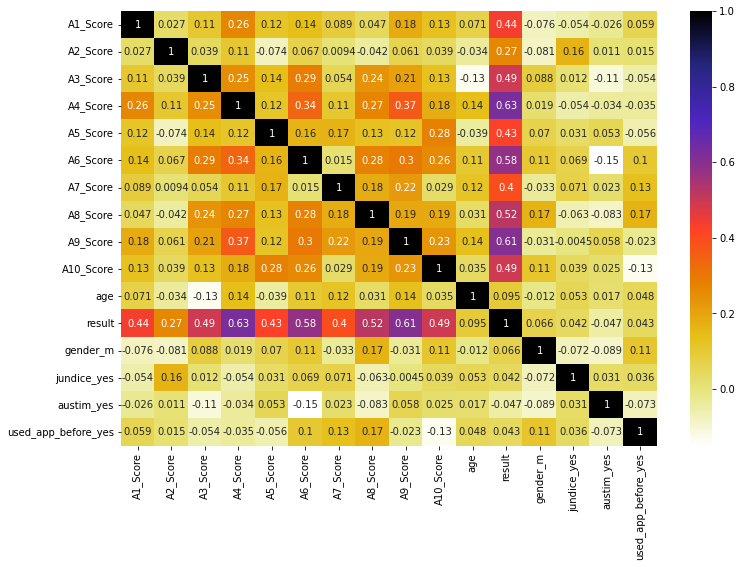

In [ ]:
plt.figure(figsize=(12, 8))
cor = X_train_mmc2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
#returns +ve and -ve highly (>threshold) correlated features/columns
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
corr_features = correlation(X_train_mmc2, 0.8)
len(set(corr_features))

0

In [ ]:
corr_features

set()

In [ ]:
X_train_mmc2.drop('used_app_before_yes', axis=1)
X_test_mmc2.drop('used_app_before_yes', axis=1)
X_test_final2.drop('used_app_before_yes', axis=1)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,gender_m,jundice_yes,austim_yes
0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.285714,0.8,1.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.142857,0.8,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.857143,0.1,1.0,0.0,1.0
3,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.285714,0.7,1.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.000000,0.8,0.0,0.0,1.0
5,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.142857,0.6,1.0,0.0,1.0
6,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.285714,0.5,0.0,0.0,0.0
7,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.000000,0.7,1.0,1.0,0.0
8,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.000000,0.9,1.0,0.0,1.0
9,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.7,1.0,1.0,0.0


**MODEL TRAINING**

1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold

lr = LogisticRegression()
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [0.1, 0.01]

grid1 = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=lr, param_grid=grid1, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_mmc2, y_train_val)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.978265 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
grid_predict_val1 = grid_result.predict(X_test_mmc2)
print(classification_report(y_test_val, grid_predict_val1))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        26
           1       0.91      1.00      0.95        21

    accuracy                           0.96        47
   macro avg       0.96      0.96      0.96        47
weighted avg       0.96      0.96      0.96        47



In [ ]:
grid_predict_test1 = grid_result.predict(X_test_final2)
print(classification_report(y_test, grid_predict_test1))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.97      0.97      0.97        30

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59



In [ ]:
print('Accuracy:', accuracy_score(y_test, grid_predict_test1))
print('Precision:', precision_score(y_test, grid_predict_test1))
print('Recall:', recall_score(y_test, grid_predict_test1))

Accuracy: 0.9661016949152542
Precision: 0.9666666666666667
Recall: 0.9666666666666667


Confusion Matrix:
 [[28  1]
 [ 1 29]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


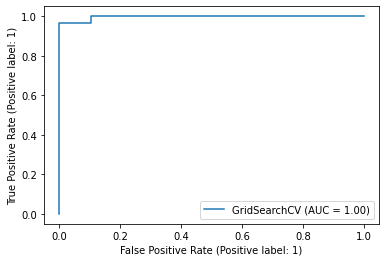

In [ ]:
print('Confusion Matrix:\n', confusion_matrix(y_test, grid_predict_test1))
plot_roc_curve(grid_result, X_test_final2, y_test)

2. Ridge Classifier

In [ ]:
from sklearn.linear_model import RidgeClassifier

rc = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

grid2 = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=rc, param_grid=grid2, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_mmc2, y_train_val)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.956920 using {'alpha': 0.1}


In [ ]:
grid_predict_test2 = grid_result.predict(X_test_final2)
print(classification_report(y_test, grid_predict_test2))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        29
           1       0.91      0.97      0.94        30

    accuracy                           0.93        59
   macro avg       0.93      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59



In [ ]:
print('Accuracy:', accuracy_score(y_test, grid_predict_test2))
print('Precision:', precision_score(y_test, grid_predict_test2))
print('Recall:', recall_score(y_test, grid_predict_test2))

Accuracy: 0.9322033898305084
Precision: 0.90625
Recall: 0.9666666666666667


Confusion Matrix:
 [[26  3]
 [ 1 29]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


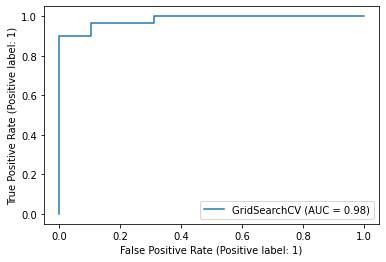

In [ ]:
print('Confusion Matrix:\n', confusion_matrix(y_test, grid_predict_test2))
plot_roc_curve(grid_result, X_test_final2, y_test)

3. K- Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

grid3 = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=grid3, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_mmc2, y_train_val)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.913938 using {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


In [ ]:
grid_predict_test3 = grid_result.predict(X_test_final2)
print(classification_report(y_test, grid_predict_test3))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        29
           1       0.88      1.00      0.94        30

    accuracy                           0.93        59
   macro avg       0.94      0.93      0.93        59
weighted avg       0.94      0.93      0.93        59



In [ ]:
print('Accuracy:', accuracy_score(y_test, grid_predict_test3))
print('Precision:', precision_score(y_test, grid_predict_test3))
print('Recall:', recall_score(y_test, grid_predict_test3))

Accuracy: 0.9322033898305084
Precision: 0.8823529411764706
Recall: 1.0


Confusion Matrix:
 [[25  4]
 [ 0 30]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


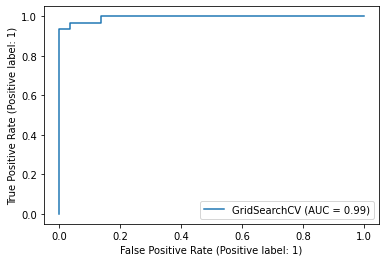

In [ ]:
print('Confusion Matrix:\n', confusion_matrix(y_test, grid_predict_test3))
plot_roc_curve(grid_result, X_test_final2, y_test)

4. SVC

In [ ]:
from sklearn.svm import SVC

svc = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

grid4 = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svc, param_grid=grid4, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_mmc2, y_train_val)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.998148 using {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}


In [ ]:
grid_predict_test4 = grid_result.predict(X_test_final2)
print(classification_report(y_test, grid_predict_test4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        30

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [ ]:
print('Accuracy:', accuracy_score(y_test, grid_predict_test4))
print('Precision:', precision_score(y_test, grid_predict_test4))
print('Recall:', recall_score(y_test, grid_predict_test4))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


5. Decision Tree

In [ ]:
from scipy.stats import randint

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {"max_depth": [None],
              "max_features": [7],
              "min_samples_leaf": [3],
              "criterion": ["gini"]}
  
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()
  
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
grid_result = tree_cv.fit(X_train_mmc2, y_train_val)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 1.000000 using {'min_samples_leaf': 3, 'max_features': 7, 'max_depth': None, 'criterion': 'gini'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


In [ ]:
grid_predict_test6 = grid_result.predict(X_test_final2)
print(classification_report(y_test, grid_predict_test6))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        29
           1       1.00      0.83      0.91        30

    accuracy                           0.92        59
   macro avg       0.93      0.92      0.91        59
weighted avg       0.93      0.92      0.91        59



In [ ]:
print('Accuracy:', accuracy_score(y_test, grid_predict_test6))
print('Precision:', precision_score(y_test, grid_predict_test6))
print('Recall:', recall_score(y_test, grid_predict_test6))

Accuracy: 0.9152542372881356
Precision: 1.0
Recall: 0.8333333333333334


Confusion Matrix:
 [[29  0]
 [ 5 25]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


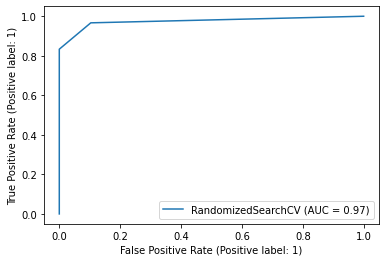

In [ ]:
print('Confusion Matrix:\n', confusion_matrix(y_test, grid_predict_test6))
plot_roc_curve(grid_result, X_test_final2, y_test)

In [ ]:
from sklearn.ensemble import BaggingClassifier

bdtc = BaggingClassifier()
n_estimators = [100, 1000]

grid5 = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=bdtc, param_grid=grid5, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_mmc2, y_train_val)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 1.000000 using {'n_estimators': 100}


In [ ]:
grid_predict_test5 = grid_result.predict(X_test_final2)
print(classification_report(y_test, grid_predict_test5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        30

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [ ]:
print('Accuracy:', accuracy_score(y_test, grid_predict_test5))
print('Precision:', precision_score(y_test, grid_predict_test5))
print('Recall:', recall_score(y_test, grid_predict_test5))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


1. *Support Vector Machine (SVM)*

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [1, 10, 100],
              'gamma': [0.3],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train_mmc2, y_train_val)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ........C=1, gamma=0.3, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.3, kernel=rbf;, score=0.946 total time=   0.0s
[CV 3/5] END ........C=1, gamma=0.3, kernel=rbf;, score=0.865 total time=   0.0s
[CV 4/5] END ........C=1, gamma=0.3, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ........C=1, gamma=0.3, kernel=rbf;, score=0.946 total time=   0.0s
[CV 1/5] END .......C=10, gamma=0.3, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END .......C=10, gamma=0.3, kernel=rbf;, score=0.973 total time=   0.0s
[CV 3/5] END .......C=10, gamma=0.3, kernel=rbf;, score=0.892 total time=   0.0s
[CV 4/5] END .......C=10, gamma=0.3, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.3, kernel=rbf;, score=0.919 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.3, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.3, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.3], 'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}
SVC(C=10, gamma=0.3)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

grid_predict_val = grid.predict(X_test_mmc2)
 
# print classification report
print(classification_report(y_test_val, grid_predict_val))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.95      0.98        21

    accuracy                           0.98        47
   macro avg       0.98      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47



In [ ]:
grid_predict_val

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0], dtype=uint8)

In [ ]:
confusion_matrix(y_test_val, grid_predict_val)

array([[26,  0],
       [ 1, 20]])

In [ ]:
grid_predict_test = grid.predict(X_test_final2)
print(classification_report(y_test, grid_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        29
           1       0.94      0.97      0.95        30

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Accuracy:', accuracy_score(y_test, grid_predict_test))
print('Precision:', precision_score(y_test, grid_predict_test))
print('Recall:', recall_score(y_test, grid_predict_test))

Accuracy: 0.9491525423728814
Precision: 0.9354838709677419
Recall: 0.9666666666666667


In [ ]:
confusion_matrix(y_test, grid_predict_test)

array([[27,  2],
       [ 1, 29]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


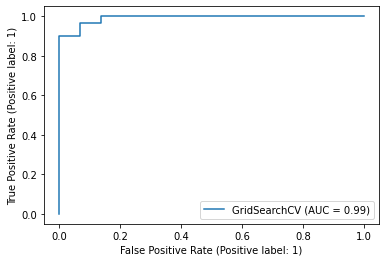

In [ ]:
plot_roc_curve(grid, X_test_final2, y_test)

**K-fold cross validation**

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
frames = [X_train_mmc2, X_test_mmc2]
result = pd.concat(frames)

In [ ]:
result.shape

(233, 16)

In [ ]:
y_train.shape

(233,)

In [ ]:
result

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,gender_m,jundice_yes,austim_yes,used_app_before_yes
0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.6,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.428571,0.7,1.0,1.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.857143,0.8,1.0,1.0,0.0,0.0
3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.857143,0.7,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.285714,0.5,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.9,0.0,0.0,0.0,0.0
43,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.857143,0.8,0.0,0.0,0.0,0.0
44,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.285714,0.6,0.0,0.0,0.0,0.0
45,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.000000,0.7,0.0,0.0,0.0,0.0


In [ ]:
kf = KFold(n_splits=3, shuffle=True)
for train, test in kf.split(result):
  print('%s %s' % (train.shape, test.shape))

(155,) (78,)
(155,) (78,)
(156,) (77,)


In [ ]:
from sklearn.model_selection import cross_val_score

svm_model = SVC()
scores = cross_val_score(svm_model, result, y_train, scoring='accuracy', cv=kf, n_jobs=2)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.562 (0.008)


2. *Artificial Neural Network*

In [ ]:
#build model
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.python.keras.layers.recurrent import LSTM
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
nn_clf = Sequential([
  Dense(84, activation='relu', input_shape=(16,)),
  Dense(128, activation='relu'),
  Dense(16, activation='softmax'),
])

nn_clf.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'],
)

nn_clf.fit(
  X_train_mmc2,
  y_train_val,
  epochs=8,
  batch_size=32,
)

y_pred = nn_clf.predict(X_test_final2)

Epoch 1/8
6/6 [==============================] - 0s 3ms/step - loss: 2.5707 - accuracy: 0.3763
Epoch 2/8
6/6 [==============================] - 0s 3ms/step - loss: 2.0662 - accuracy: 0.5161
Epoch 3/8
6/6 [==============================] - 0s 4ms/step - loss: 1.5483 - accuracy: 0.5753
Epoch 4/8
6/6 [==============================] - 0s 4ms/step - loss: 1.0851 - accuracy: 0.8011
Epoch 5/8
6/6 [==============================] - 0s 3ms/step - loss: 0.7836 - accuracy: 0.7957
Epoch 6/8
6/6 [==============================] - 0s 3ms/step - loss: 0.6371 - accuracy: 0.7473
Epoch 7/8
6/6 [==============================] - 0s 3ms/step - loss: 0.5554 - accuracy: 0.8548
Epoch 8/8
6/6 [==============================] - 0s 3ms/step - loss: 0.4862 - accuracy: 0.8763


In [ ]:
nn_clf.summary()

Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_192 (Dense)           (None, 84)                1428      
                                                                 
 dense_193 (Dense)           (None, 128)               10880     
                                                                 
 dense_194 (Dense)           (None, 16)                2064      
                                                                 
Total params: 14,372
Trainable params: 14,372
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_probs = nn_clf.predict(X_test_final2, verbose=0)
y_probs = y_probs[:, 0]
y_probs

array([0.2650292 , 0.34066898, 0.79003054, 0.35314953, 0.44254172,
       0.5755189 , 0.50469154, 0.45561582, 0.294898  , 0.48702165,
       0.15812922, 0.17519389, 0.6687657 , 0.7640609 , 0.44685167,
       0.47837213, 0.52181417, 0.31008562, 0.55526865, 0.62475806,
       0.5546595 , 0.5976153 , 0.22108594, 0.50160694, 0.25040707,
       0.65629274, 0.4607818 , 0.4495602 , 0.27989596, 0.40684322,
       0.61118126, 0.13375922, 0.31526026, 0.60839134, 0.29183358,
       0.15322396, 0.41409922, 0.52043444, 0.6383632 , 0.1734958 ,
       0.32991785, 0.2308445 , 0.48738825, 0.26182973, 0.19411266,
       0.575216  , 0.5142473 , 0.16525587, 0.47961134, 0.17944495,
       0.6055024 , 0.64628386, 0.17038536, 0.68353045, 0.509687  ,
       0.31693435, 0.67131865, 0.13375922, 0.73551506], dtype=float32)

In [ ]:
y_pred = np.array(y_probs <= 0.5, dtype=int)
accuracy_score(y_test, y_pred, normalize=False)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87        29
           1       0.83      0.97      0.89        30

    accuracy                           0.88        59
   macro avg       0.89      0.88      0.88        59
weighted avg       0.89      0.88      0.88        59



In [ ]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[23  6]
 [ 1 29]]


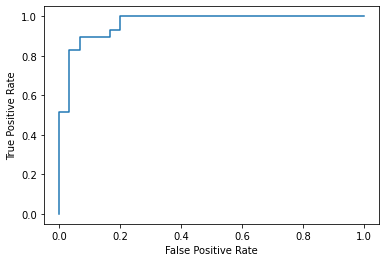

In [ ]:
fpr , tpr , thresholds = roc_curve(y_test , y_probs)
plt.plot(tpr,fpr) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.show()